<a href="https://colab.research.google.com/github/polock11/bmw_used_cars_analysis/blob/main/bmw_used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis on the bmw dataset
**The primary goal is to get valuable insight and find relations between the features**.

N.B: Each observation is given below the correspondent output cell.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('bmw.csv')
display(df.head())
display(df.tail())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10776,X3,2016,19000,Automatic,40818,Diesel,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,64.2,2.0
10780,X1,2017,15981,Automatic,59432,Diesel,57.6,2.0


In [ ]:
display(df.info())
print("Shape: ")
shape = display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 673.9+ KB


None

Shape: 


(10781, 8)

**Dataset Observations**:


*   The dataset has total 10781 entries as rows and 8 columns. 
*   There is a of int, float and object type data in the feature variables
*   No null value is present

-------

**Feature Explanation**:


1.   **model**: Name of the car models
2.   **year**: Release year of the model
3.   **price**: sell value after the first hand use
4.   **transmission**: Release year of the model
5.   **mileage**: Total miles count till the date of second hand sell
6.   **fuelType**: Type of fuel for the engine
7.   **mpg**: mileage per galon
8.   **engineSize**: size of the engine

Target Variable: **price**


---

**Data Types:**
    
   Total **3** types of data can be seen. Which are

*   **object**: model, transmission, fuelType
*   **int64**: year, price, mileage
*   **float64**: mpg, engineSize



In [ ]:
display(df.describe())
display(df.describe(include = 'O'))

,year,price,mileage,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,470.800000,6.600000


,model,transmission,fuelType
count,10781,10781,10781
unique,24,3,5
top,3 Series,Semi-Auto,Diesel
freq,2443,4666,7027


##**Observation of numeric features:**



*   Newest model is from 2020 and Oldest model is from 1996
*   price range is from USD 1200 to USD 123456 
*   mileage varied from 1 (needs further investigation) to 214000 miles
*   mpg from 0 (needs further investigation) to 470
*   engineSize ranged between 0 (needs further investigation) to 6.60 m/g


---

##**Observation of categorical features:**
* Total 24 unique models are present in the dataset where **3 Series** has the highest frequency 
* 3 types of transmission can be found with **Semi-Auto** type having max count
* There are 5 types of fuel used in the cars and **Desiel** used most often 


#**Feature Analysis**

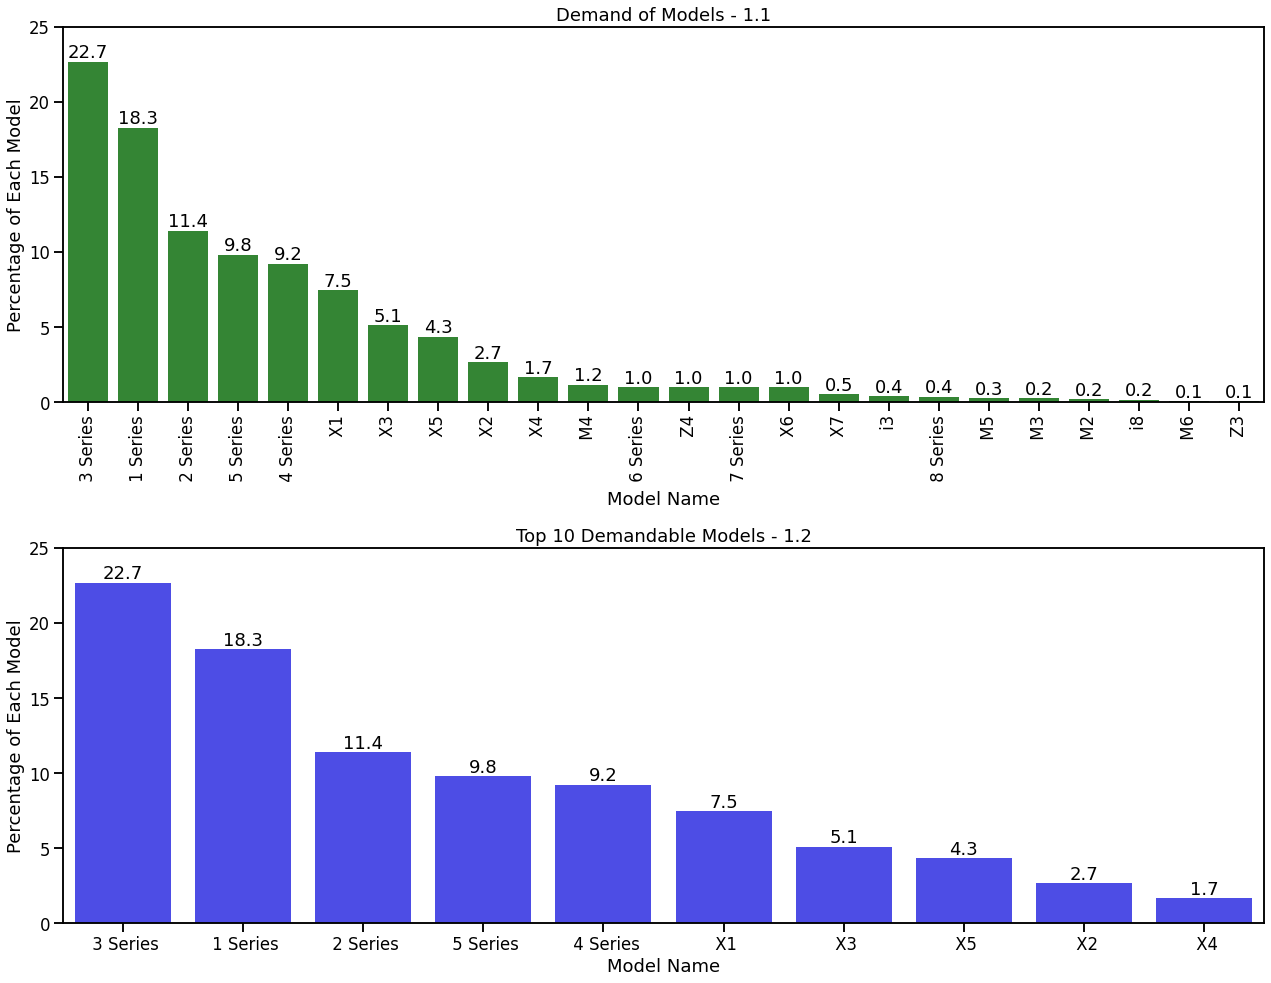

In [ ]:
#visual representation of the poular models in barchart

model = pd.DataFrame(df['model'].value_counts())
model = model.reset_index()
model = model.rename(columns = {'index':'model',
                                'model': 'count'})
#calculating the percentage of each model and adding them im the model dataframe
model['percent'] = (model['count']/sum(model['count'])) * 100

model = model.round(2)

#to make the plots clear and readable
sns.set_context('talk')
plt.figure(figsize = (18,14))

#comparison between all available modles 
plt.subplot(2,1,1)
splot = sns.barplot(x = 'model', y = 'percent', data = model, color = 'green', alpha = .85)

#for adding annotation of the percentage on each bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xticks(rotation = 90)
plt.yticks(np.arange(0, int(model['percent'].max())+6, 5))
plt.xlabel("Model Name")
plt.ylabel("Percentage of Each Model")
plt.title('Demand of Models - 1.1')

#comparison between top available modles
plt.subplot(2,1,2)
splot = sns.barplot(x = 'model', y = 'percent', data = model.head(10), color = 'blue' ,alpha = .80)

#for adding annotation of the percentage on each bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.yticks(np.arange(0, int(model['percent'].max())+6, 5))
plt.xlabel("Model Name")
plt.ylabel("Percentage of Each Model")
plt.title('Top 10 Demandable Models - 1.2')

plt.tight_layout()
plt.show()


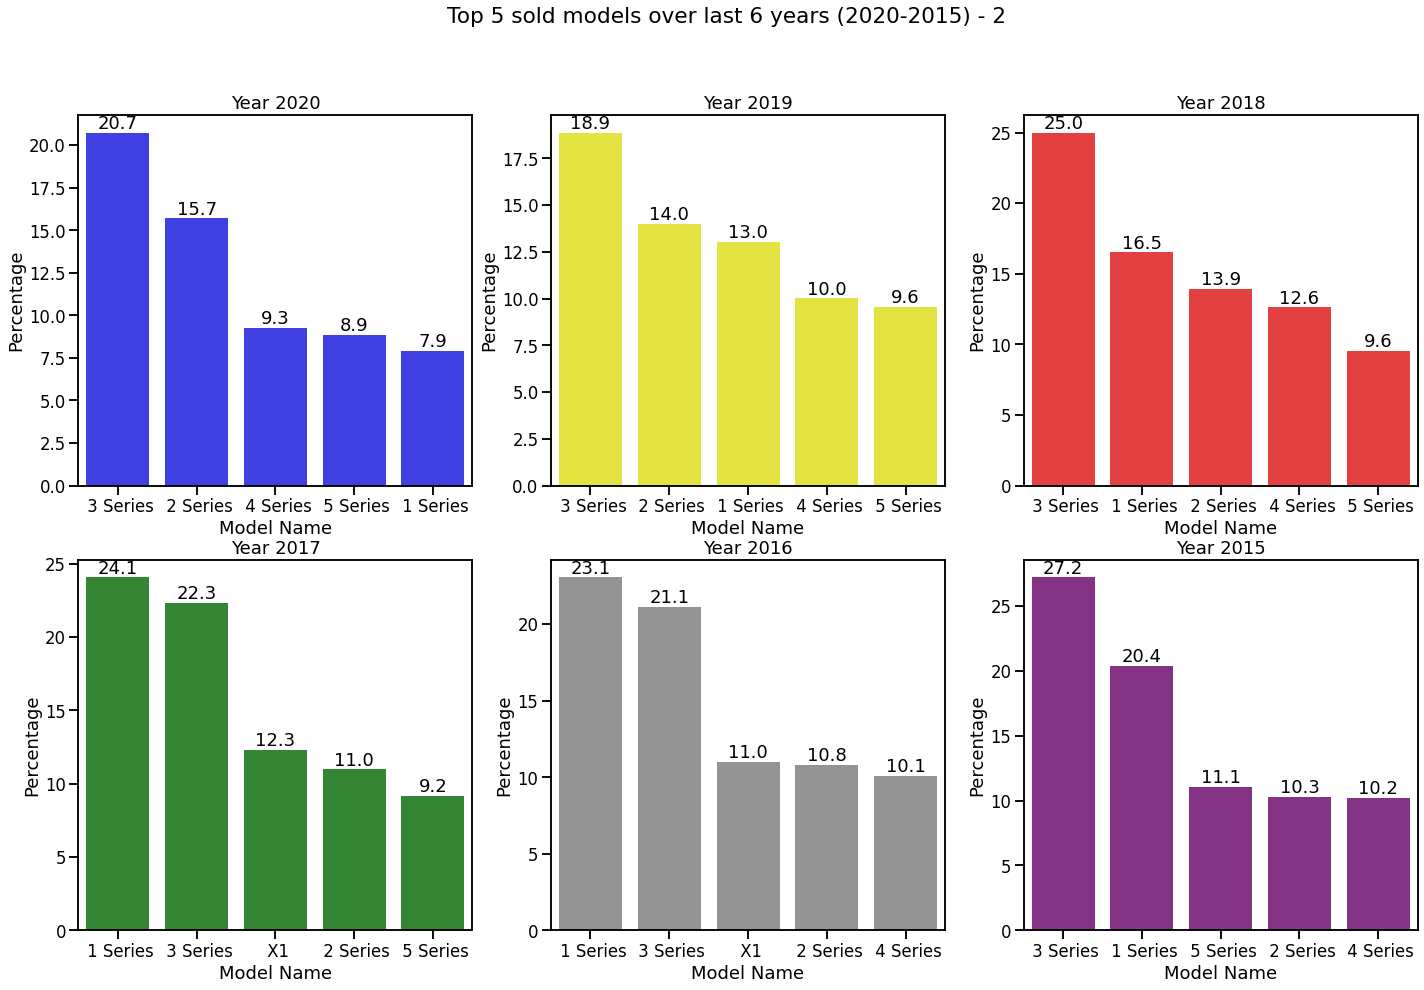

In [ ]:
#returns a dataFrame withe model name, count and percent with specific years

def per_year(year, bar_color):
    each_year = df[df['year'] == year]
    each_year = pd.DataFrame(each_year['model'].value_counts())
    each_year = each_year.reset_index()
    each_year = each_year.rename(columns={'index':'model',
                                'model':'count'})
    each_year['percent'] = (each_year['count']/sum(each_year['count']))*100
    each_year = each_year.round(2)
    
    splot = sns.barplot(x = 'model', y = 'percent', data = each_year.head(), color = bar_color, alpha = .85)
    plt.xlabel('Model Name')
    plt.ylabel('Percentage')
    plt.title('Year ' + str(year))
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    return splot

sns.set_context('talk')
plt.figure(figsize = (24,15))

plt.subplot(2,3,1)
per_year(2020, 'blue')

plt.subplot(2,3,2)
per_year(2019, 'yellow')

plt.subplot(2,3,3)
per_year(2018, 'red')

plt.subplot(2,3,4)
per_year(2017, 'green')

plt.subplot(2,3,5)
per_year(2016, 'gray')

plt.subplot(2,3,6)
per_year(2015, 'purple')

plt.suptitle('Top 5 sold models over last 6 years (2020-2015) - 2')
#plt.tight_layout()
plt.show()


**Observation:**

For the past 6 years 3 Series, 2 Series, 1 Series, 4 Sereis cars are in demand, though some change in the position can be seen. In 2020 3,2,1 Series cars were in the first three positions where in 2016 1, 3, X1 Series cars were in front.   

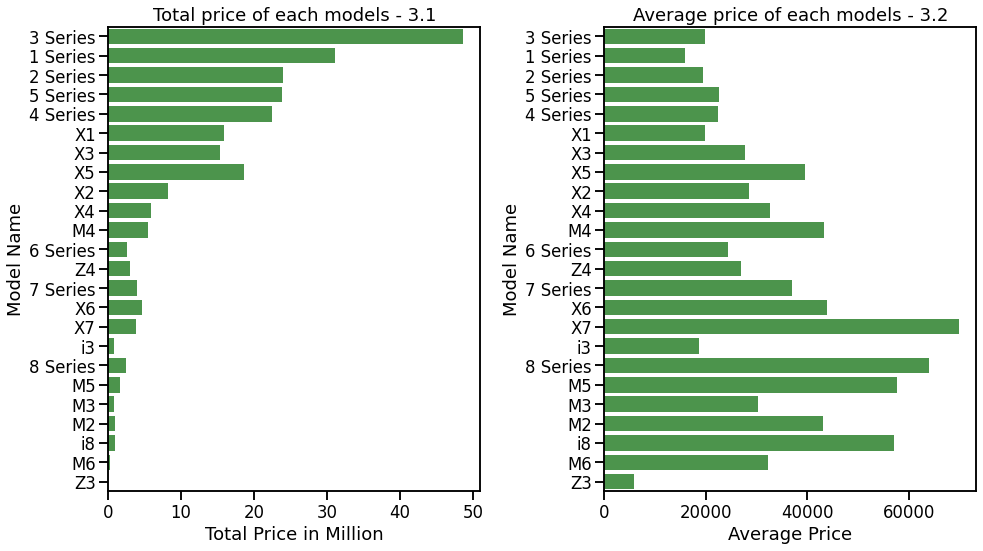

In [ ]:
#creating a dataframe with top sold models
top_model = pd.DataFrame(df['model'].value_counts())
top_model = top_model.reset_index()
top_model = top_model.rename(columns = {'index':'model',
                                        'model':'count'})
#taking top 5 models in a list
top_model_list = list(top_model['model'])

#removing the whitespaces
for i in range(0,(len(top_model_list))):
        x = str(top_model_list[i]).strip(' ')
        top_model_list[i] = x

top_model_price = []
top_model_avg_price = []
top_model_count = list(top_model["count"])

#finding the sum of total prices for each model in the top 5 sold models 
for model in top_model_list:
    #selecting cars with a particular model and storing them in a dataframe
    model_df = df[df['model'].str.contains(model)]
    top_model_price.append(sum(model_df['price'])/1000000)

#creating a dataframe with the top models and total sum of their prices
total_price = pd.DataFrame({'model':top_model_list,
                            'price':top_model_price})
total_price = total_price.round(2)


#finding average
top_model_avg_price = []
for i in range(len(top_model_count)):
    top_model_avg_price.append((top_model_price[i]*1000000)/top_model_count[i])

averege_price = pd.DataFrame({'model':top_model_list,
                            'avg_price':top_model_avg_price})
averege_price = averege_price.round(2)


sns.set_context('talk')
plt.figure(figsize = (14,8))

plt.subplot(1,2,1)
sns.barplot(x = 'price', y = 'model', data = total_price, color = 'green', alpha = .75)
plt.ylabel('Model Name')
plt.xlabel('Total Price in Million')
plt.title('Total price of each models - 3.1')

plt.subplot(1,2,2)
sns.barplot(x = 'avg_price', y = 'model', data = averege_price, color = 'green', alpha = .75)
plt.xlabel('Average Price')
plt.ylabel('Model Name')
plt.title('Average price of each models - 3.2')

plt.tight_layout()
plt.show()

**Observation:**

* Total 3 Series cars sold worth 48.6 million USD followed by 1 Series worth 31.1 million and 2 sereis worth 24 million USD.
* X7 has the highest average price of 68k followed by 8 Series and i8 with a price tag of 63k and 58k accordingly. However, 3, 1, 2, 4 Series cars falls in a lower price range of 20k to 24k and these cars are very popular in the second hand market.    

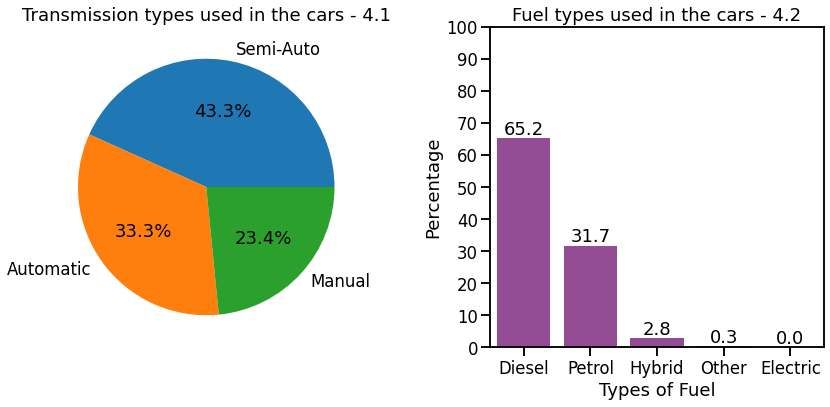

In [ ]:
#sns.set_context('talk')
plt.figure(figsize = (12,6))

#plotting pie chart based on transmission
plt.subplot(1,2,1)
df['transmission'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Transmission types used in the cars - 4.1')

#plotting bar for fueltypes
plt.subplot(1,2,2)

#creating dataframe to calculate the percentage of ecah fuel type
fuel_type = pd.DataFrame(df['fuelType'].value_counts())
fuel_type = fuel_type.reset_index()
fuel_type = fuel_type.rename(columns={'index':'fuel_type',
                           'fuelType':'count'})
fuel_type['percent'] = (fuel_type['count']/sum(fuel_type['count']))*100
fuel_type = fuel_type.round(2)

splot = sns.barplot(x = 'fuel_type', y = 'percent', data = fuel_type, color = 'purple', alpha = .75)
plt.yticks(np.arange(0, 101, 10))
plt.xlabel("Types of Fuel")
plt.ylabel('Percentage')
plt.title('Fuel types used in the cars - 4.2')

#for adding annotation on each bar
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
plt.tight_layout()        
plt.show()

**Observation:**

* **43%** of the cars in the data set have **Semi-Auto** transmission, whereas **33%** has **Automatic** and **23%** has **Manual** transmission.
* The largest portion of cars were sold using **Diesel** with **65%** and **Pertol** with **31%**. **Hybrid** cars were very low at **2.8%** and **Other** and **Electric** cars are nearly close to **0**.   

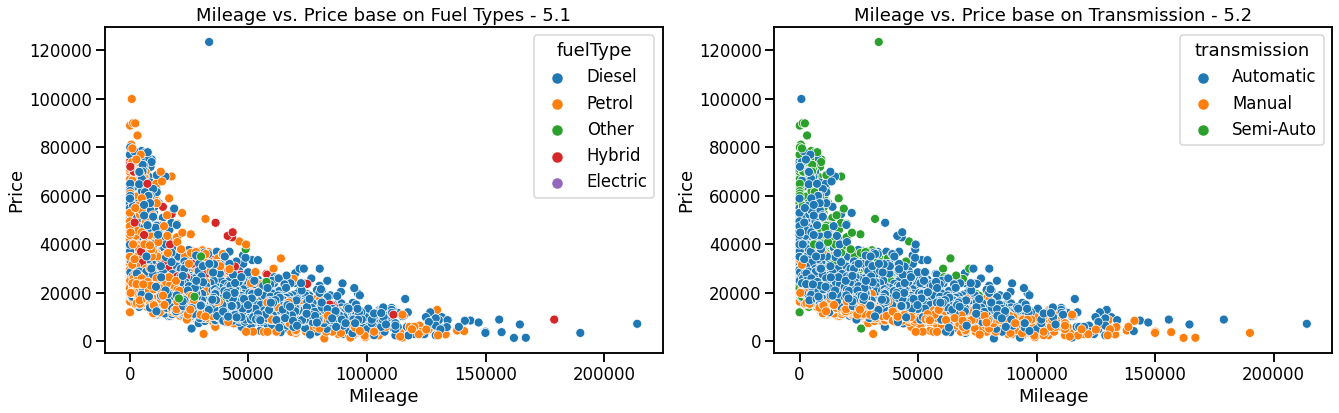

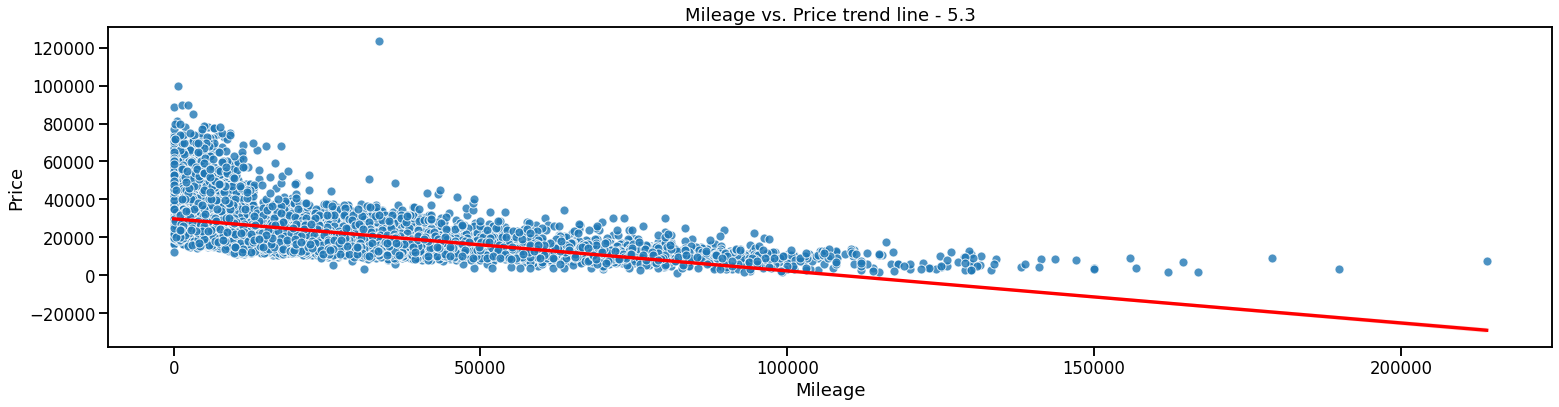

In [ ]:
plt.figure(figsize = (22,6))

#plotting mileage vs price scatter plot with fuelType as hue
plt.subplot(1,2,1)
sns.scatterplot(y = 'price', x = 'mileage', data = df, hue = 'fuelType')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price base on Fuel Types - 5.1')

#plotting mileage vs price scatter plot with transmission as hue
plt.subplot(1,2,2)
sns.scatterplot(y = 'price', x = 'mileage', data = df, hue = 'transmission')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price base on Transmission - 5.2')

#plotting with the regression line
plt.figure(figsize = (22,6))
sns.regplot(x = 'mileage', y = 'price', data = df, line_kws = {"color" : "red"}, scatter_kws = {"edgecolor" : "white"})
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price trend line - 5.3')

plt.tight_layout()
plt.show()

**Observations:**

**Mileage Vs Price based of Fuel Types - 5.1:**

* Most diesel cars falls under 0-40k, petrol cars falls under 15k-60k. very few hybrid cars are seen between 38k-55k.Cars with other fuel type has a range of 20k-40k. No presence of electric cars.
* Price is decreasing as the mileage increases in terms of evey fuel type cars.


---
**Mileage Vs Price based on Transmission - 5.2:**

* Semi-Auto cars has the highest price range followed by Automatic and Manual cars.
* Price is decreasing as the mileage increases in terms of evey transmission type.



---

**Mileage Vs Price trend line - 5.2:**
* Overall a negative relation can be seen. As the mileage decreases price increases.


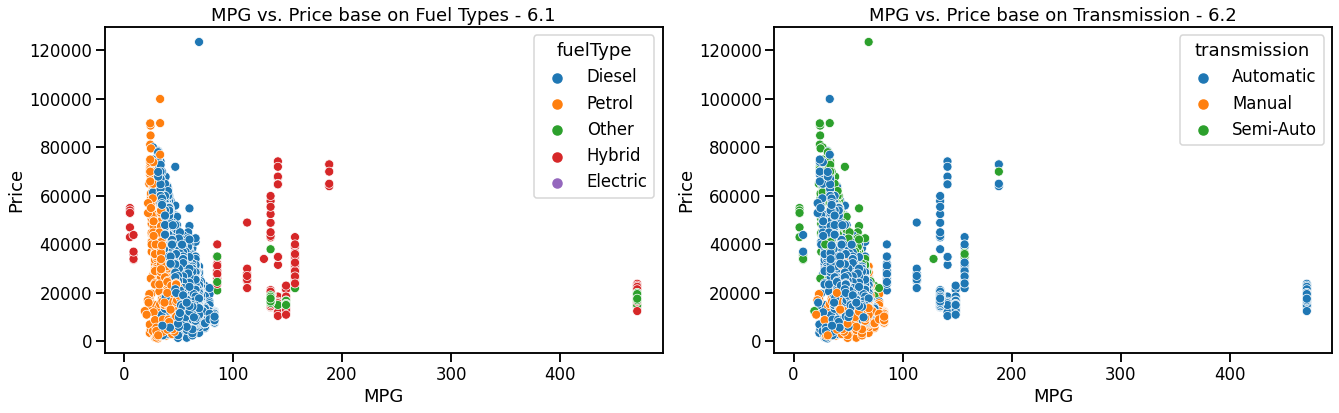

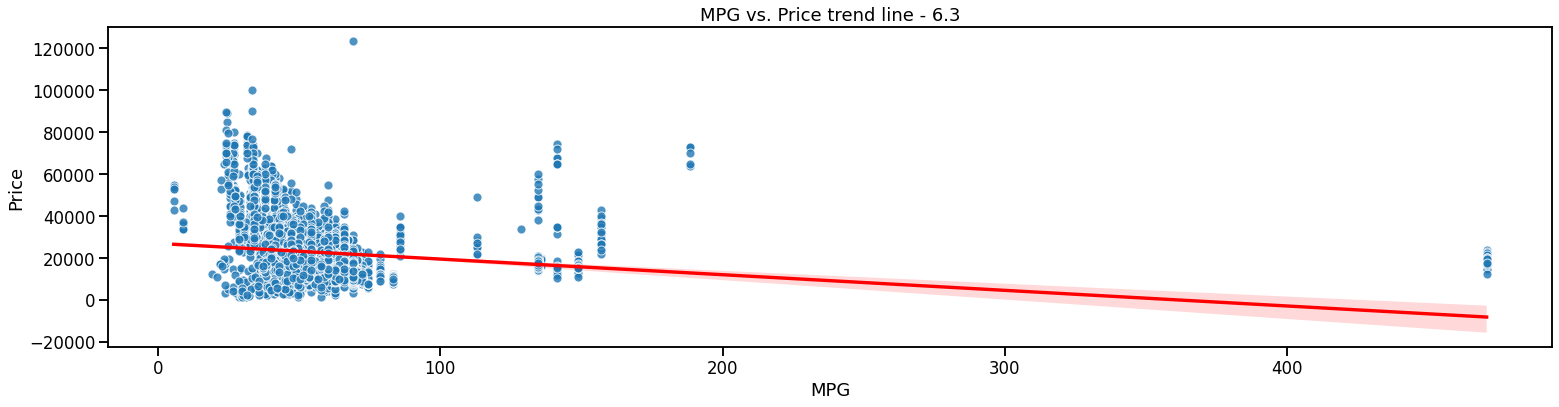

In [ ]:
plt.figure(figsize = (22,6))

#plotting mileage per galon vs price scatter plot with fuelType as hue
plt.subplot(1,2,1)
sns.scatterplot(y = 'price', x = 'mpg', data = df, hue = 'fuelType')
plt.xlabel('MPG')
plt.ylabel('Price')
plt.title('MPG vs. Price base on Fuel Types - 6.1')

#plotting mileage per galon vs price scatter plot with transmissin as hue
plt.subplot(1,2,2)
sns.scatterplot(y = 'price', x = 'mpg', data = df, hue = 'transmission')
plt.xlabel('MPG')
plt.ylabel('Price')
plt.title('MPG vs. Price base on Transmission - 6.2')

#plotting with the regression line
plt.figure(figsize = (22,6))
sns.regplot(x = 'mpg', y = 'price', data = df, line_kws = {"color" : "red"}, scatter_kws = {"edgecolor" : "white"})
plt.xlabel('MPG')
plt.ylabel('Price')
plt.title('MPG vs. Price trend line - 6.3')

plt.tight_layout()
plt.show()

**Observations:**

**MPG Vs Price based of Fuel Types - 6.1:**

* Diesel cars are more efficient then pertrol cars in terms of MPG, they also come at a lower price range then petrol cars. Hybrid cars has the most efficienty.
* Price is decreasing as the mpg increases in terms of evey fuel type cars.


---
**Mileage Vs Price based on Transmission - 6.2:**

* Automatic cars has more mpg then any other cars.
* Price is decreasing as the mileage increases in terms of evey transmission type.



---

**Mileage Vs Price trend line - 6.3:**
* Overall a negative relation can be seen. As the mpg decreases price increases.


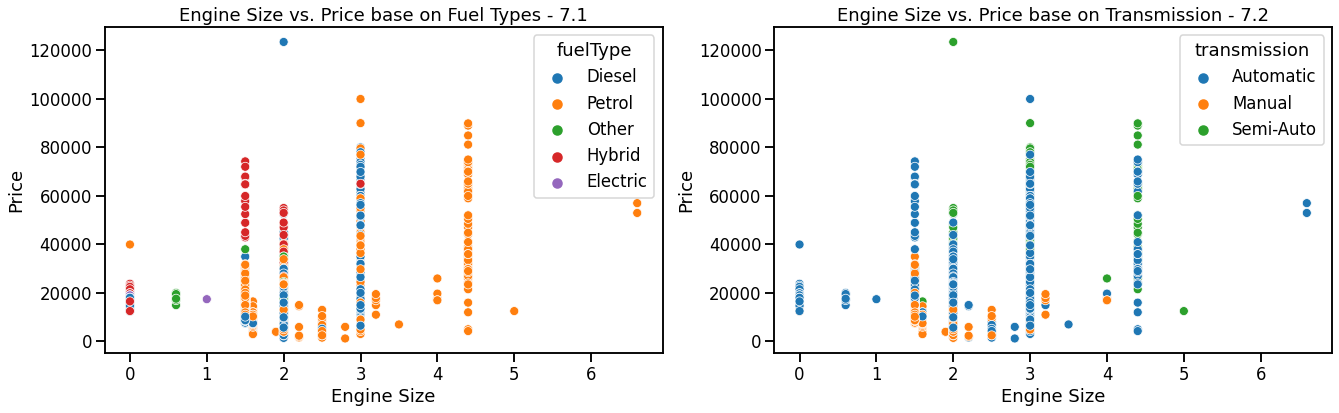

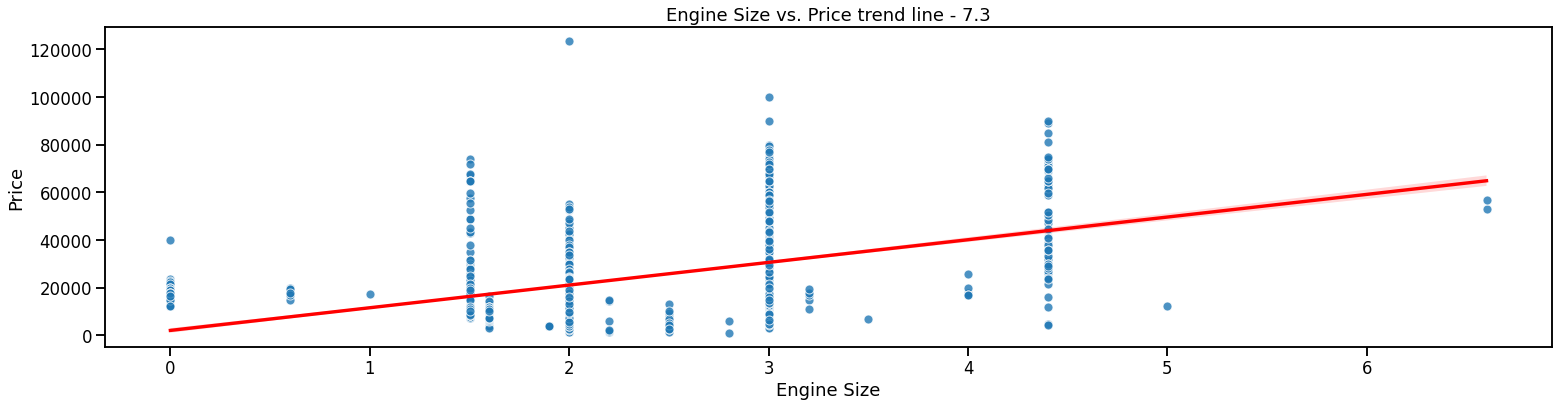

In [ ]:
plt.figure(figsize = (22,6))

#plotting engineSize vs price scatter plot with fuelType as hue
plt.subplot(1,2,1)
sns.scatterplot(y = 'price', x = 'engineSize', data = df, hue = 'fuelType')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs. Price base on Fuel Types - 7.1')

#plotting engineSize vs price scatter plot with transmission as hue
plt.subplot(1,2,2)
sns.scatterplot(y = 'price', x = 'engineSize', data = df, hue = 'transmission')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs. Price base on Transmission - 7.2')

#plotting with the regression line
plt.figure(figsize = (22,6))
sns.regplot(x = 'engineSize', y = 'price', data = df, line_kws = {"color" : "red"}, scatter_kws = {"edgecolor" : "white"})
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs. Price trend line - 7.3')

plt.tight_layout()
plt.show()

**Observations:**

**Engine Size Vs Price based of Fuel Types - 7.1:**

* Petrol cars has the largest engine size followed by diesel and hybrid cars.
* Price is increasing as the engine size increases in terms of evey fuel type cars.


---
**Mileage Vs Price based on Transmission - 7.2:**

* Automatic cars has most wide range of engine size.
* Price is increasing as the engine size increases in terms of evey transmission type.



---

**Mileage Vs Price trend line - 7.3:**
* Overall a positive relation can be seen. As the engine size increases price increases.

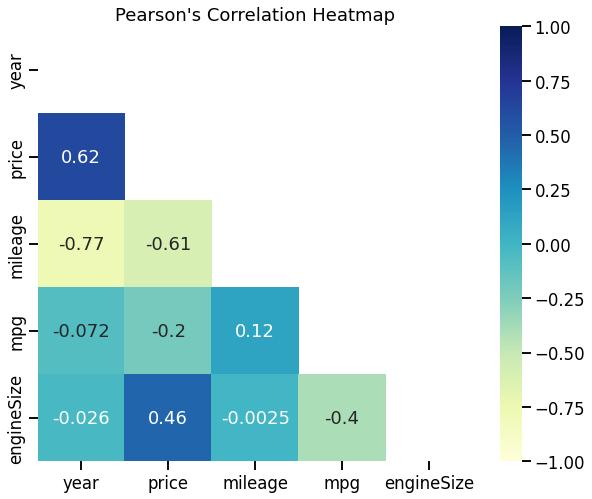

In [ ]:
plt.figure(figsize = (10,8))
cor_matrix = df.corr()
cor_matrix.head()

mask = np.zeros_like(cor_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = cor_matrix, vmin=-1, vmax=1, annot = True, square = True, cmap = 'YlGnBu', mask = mask)
plt.title('Pearson\'s Correlation Heatmap')
plt.show()

**Observation:**

* **price vs year**: over the years resale value increased.
* **mpg vs mileage**: the cars has more mpg they were being used longer.
* **engineSize vs price**:  cars with a larger engine has a high price. 
* **mileage vs price:** cars with higher mileage has a lower price. 
* **engineSize vs mpg:** as engine size increases, mpg decreases
* **mpg vs price**:  cars with more mpg has a lower price.



#**Distribution of Numeric Data**

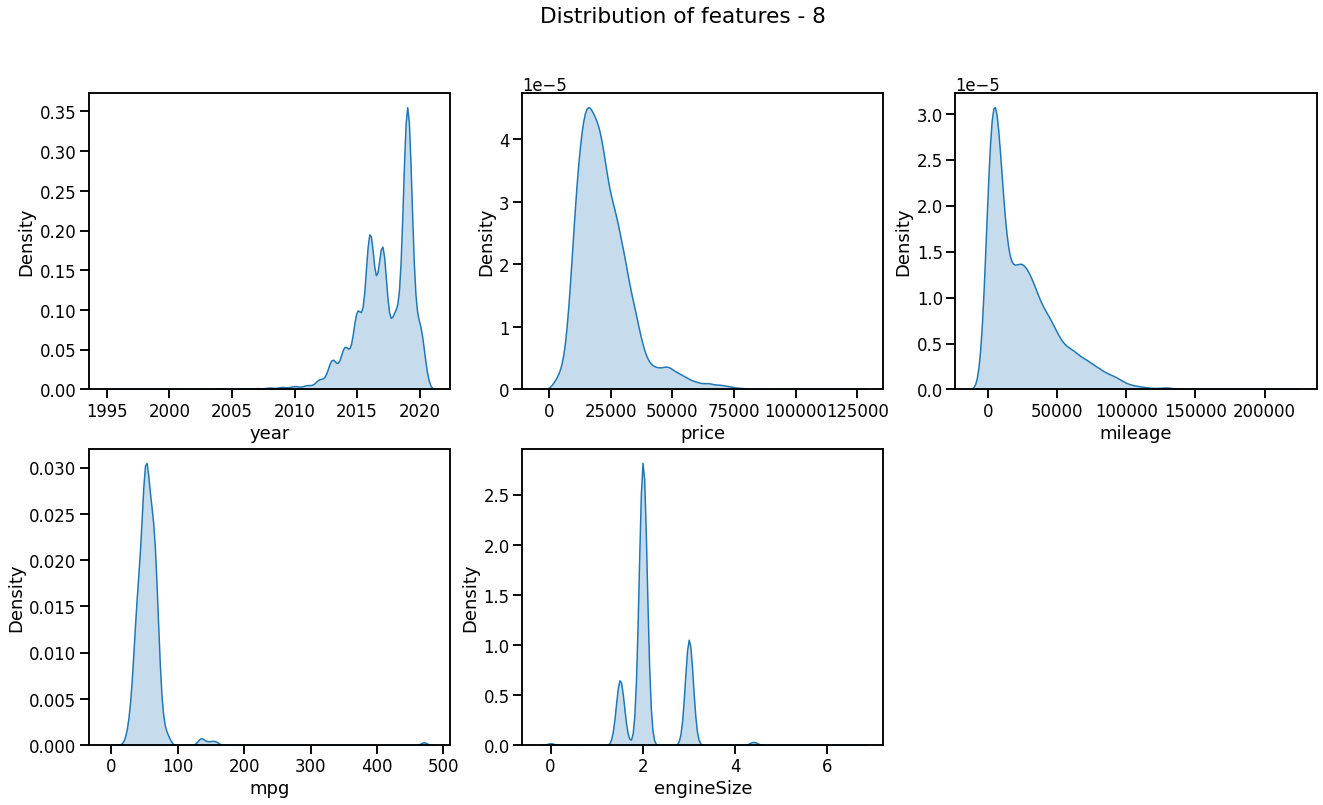

In [ ]:
plt.figure(figsize = (22, 12))

#taking only numeric data types in a list
numeric_col = []

for col in df.columns:
    if df[col].dtypes != 'O':
        numeric_col.append(col)

#plotting kde for only for the numeric data types        
for i in range(len(numeric_col)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x = numeric_col[i], data = df, fill = True)
    

plt.suptitle('Distribution of features - 8')
plt.show()

**Observations:**

The distribution plots of each numeric shows that the features are not normally distributed. Most of them has a skewed distribution. 